# Assignment 07: Control Charts for Attributes I
Sydney Perrin

March 3rd, 2022

## Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat

## Import Data

In [2]:
df = pd.read_csv('07 data.csv')
#df.head(100)

## 1. The dataset contains data on examination of medical insurance claims. Every day 50 claims were examined. Set up the fraction nonconforming control chart for this process. Is the process in statistical control?
ANS: See p chart in the code below. No, the process is not in statistical control because there is a point out of bounds in the control chart.

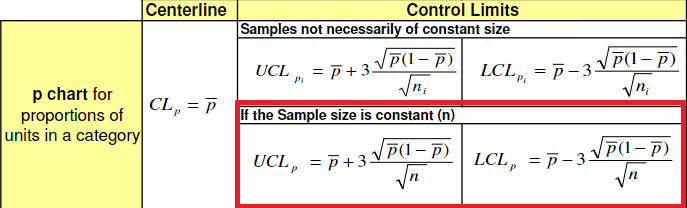

### p Chart Calculations

In [3]:
n=50 # Constant
pvalues = df.insurance_nonc/n
pbar = pvalues.mean()
CL_p = pbar
UCL_p = pbar + 3*np.sqrt((pbar*(1-pbar))/n)
LCL_p = pbar - 3*np.sqrt((pbar*(1-pbar))/n)

print('CL_p=', CL_p)
print('UCL_p=', UCL_p)
print('LCL_p=', LCL_p)

CL_p= 0.10700000000000001
UCL_p= 0.23814564422808712
LCL_p= -0.0241456442280871


### Plot p Chart

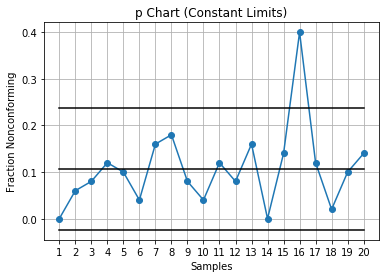

In [4]:
m=20
ucl_line = np.full(m,UCL_p) 
lcl_line = np.full(m,LCL_p)
cl_line = np.full(m,CL_p)
plt.plot(pvalues,marker="o")
plt.plot(ucl_line,color='k')
plt.plot(lcl_line,color='k')
plt.plot(cl_line,color='k')

labels = list(range(1,m+1)) 
x = list(range(0,m)) 
plt.xticks(x,labels) 

plt.grid(True)
plt.title('p Chart (Constant Limits)')
plt.ylabel('Fraction Nonconforming')
plt.xlabel('Samples')
plt.show()

# There is a point out of bounds.

## 2. What center line and control limits should be used for process monitoring in the next period?
ANS: The control limits are CL=0.0916, UCL=0.214 and LCL=-0.0308

### Iterate

In [5]:
pvalues = pvalues[(pvalues > LCL_p) & (pvalues < UCL_p)]
pbar = pvalues.mean()
CL_p = pbar
UCL_p = pbar + 3*np.sqrt((pbar*(1-pbar))/n)
LCL_p = pbar - 3*np.sqrt((pbar*(1-pbar))/n)

print('CL_p=', CL_p)
print('UCL_p=', UCL_p)
print('LCL_p=', LCL_p)

CL_p= 0.09157894736842107
UCL_p= 0.21394971135278273
LCL_p= -0.030791816615940604


### Plot to check no remaining points out of bounds

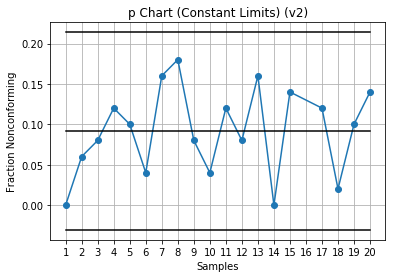

In [6]:
m=20
ucl_line = np.full(m,UCL_p) 
lcl_line = np.full(m,LCL_p)
cl_line = np.full(m,CL_p)
plt.plot(pvalues,marker="o")
plt.plot(ucl_line,color='k')
plt.plot(lcl_line,color='k')
plt.plot(cl_line,color='k')

labels = list(range(1,m+1)) 
x = list(range(0,m)) 
plt.xticks(x,labels) 

plt.grid(True)
plt.title('p Chart (Constant Limits) (v2)')
plt.ylabel('Fraction Nonconforming')
plt.xlabel('Samples')
plt.show()

# There are no points out of bounds.

## 3. What are the center line and control limits in an np-chart for the process?
ANS: The center line and control limits for the np-chart are CL=4.38, UCL=10.70 and LCL=-1.54

In [7]:
npbar = n*pbar
CL_np= npbar
UCL_np =  npbar + 3*np.sqrt((npbar*(1-pbar)))
LCL_np =  npbar - 3*np.sqrt((npbar*(1-pbar)))

print('CL_np=', CL_np)
print('UCL_np=', UCL_np)
print('LCL_np=', LCL_np)

CL_np= 4.578947368421053
UCL_np= 10.697485567639136
LCL_np= -1.5395908307970299


## 4. The commercial loan operation of a financial institution has a standard for processing new loan applications in 24 hours. The dataset shows the number of applications processed each day for the last 20 days and the number of applications that required more than 24 hours to complete. Using a variable-width control limit approach, what is the initial center line?
ANS: The initial center line is CL=0.018

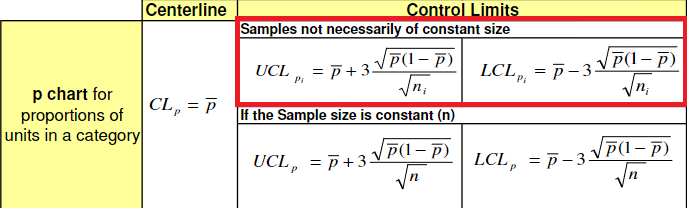

### p Chart Calculations

In [8]:
m=20 # days
ni = df.num_app # variable size per day
xi = df.num_late # num of defectives
pi = xi/ni #pvalues
pbar = df.num_late.sum()/df.num_app.sum()
CL = pbar 
UCL= pbar + 3*np.sqrt((pbar*(1-pbar))/ni)
LCL = pbar - 3*np.sqrt((pbar*(1-pbar))/ni) 

print('CL=', CL)

CL= 0.01821457165732586


### Plot p Chart

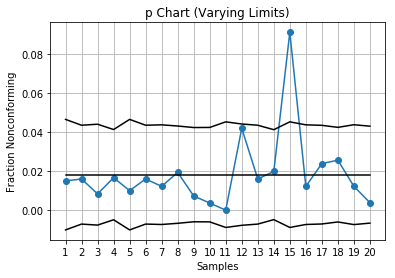

In [9]:
m=20
ucl_line = np.full(m,UCL) 
lcl_line = np.full(m,LCL)
cl_line = np.full(m,CL)
plt.plot(pi,marker="o")
plt.plot(ucl_line,color='k')
plt.plot(lcl_line,color='k')
plt.plot(cl_line,color='k')

labels = list(range(1,m+1)) 
x = list(range(0,m)) 
plt.xticks(x,labels) 

plt.grid(True)
plt.title('p Chart (Varying Limits)')
plt.ylabel('Fraction Nonconforming')
plt.xlabel('Samples')
plt.show()

# There is a point out of bounds. Iterate in Q6.

## 5. Using the variable-width control chart from last question, is the process in control?
ANS: No, the process is not in control because there is a point out of bounds in the p chart.

## 6. What is the center line that can be used in a chart for monitoring in next period?
ANS: The center line used in the next monitoring period is CL=0.0132

### Iterate

In [10]:
pi2 = pi[(pi > LCL) & (pi < UCL)]
pbar2 = pi2.mean()
CL2 = pbar2
UCL2 = pbar2 + 3*np.sqrt((pbar2*(1-pbar2))/ni)
LCL2 = pbar2 - 3*np.sqrt((pbar2*(1-pbar2))/ni) 
print('CL_p=', CL2)

CL_p= 0.014748066709523623


### Plot to check no remaining points out of bounds

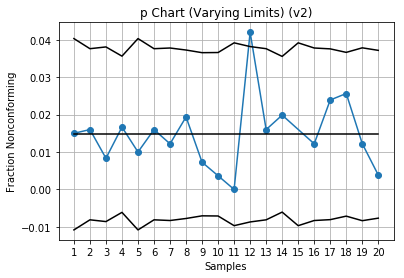

In [11]:
ucl_line = np.full(m,UCL2) 
lcl_line = np.full(m,LCL2)
cl_line = np.full(m,CL2) 
plt.plot(pi2,marker="o")
plt.plot(ucl_line,color='k')
plt.plot(lcl_line,color='k')
plt.plot(cl_line,color='k')

labels = list(range(1,m+1)) 
x = list(range(0,m)) 
plt.xticks(x,labels) 

plt.grid(True)
plt.title('p Chart (Varying Limits) (v2)')
plt.ylabel('Fraction Nonconforming')
plt.xlabel('Samples')
plt.show()

# There is a point out of bounds. Iterate again.

### Iterate

In [12]:
pi3 = pi[(pi > LCL2) & (pi < UCL2)]
pbar3 = pi3.mean()
CL3 = pbar3
UCL3 = pbar3 + 3*np.sqrt((pbar3*(1-pbar3))/ni)
LCL3 = pbar3 - 3*np.sqrt((pbar3*(1-pbar3))/ni) 
print('CL_p=', CL3)

CL_p= 0.01323313670879221


### Plot to check no remaining points out of bounds

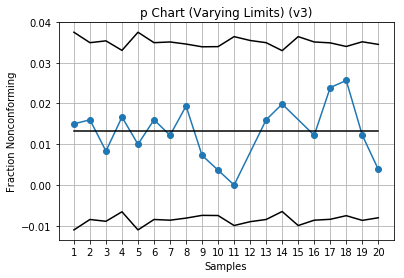

In [13]:
ucl_line = np.full(m,UCL3) 
lcl_line = np.full(m,LCL3) 
cl_line = np.full(m,CL3) 
plt.plot(pi3,marker="o")
plt.plot(ucl_line,color='k')
plt.plot(lcl_line,color='k')
plt.plot(cl_line,color='k')

labels = list(range(1,m+1)) 
x = list(range(0,m)) 
plt.xticks(x,labels) 

plt.grid(True)
plt.title('p Chart (Varying Limits) (v3)')
plt.ylabel('Fraction Nonconforming')
plt.xlabel('Samples')
plt.show()

# There are no points out of bounds.

## 7. What is the average sample size?
ANS: The average sample size is n=249.8

In [14]:
ni = df.num_app # variable size per day
nbar=ni.mean()
print('Average sample size=',nbar)

Average sample size= 249.8


## 8. Starting with the original data, set up the fraction nonconforming control chart for this process using the average sample size control limit approach. Is the process in statistical control according to this chart?
ANS: See p chart in the code below. No, the process is not in statistical control because there is a point out of bounds in the control chart.

### p Chart Calculations

In [15]:
pbar=df.num_late.sum()/df.num_app.sum() # Original data
pi=df.num_late/df.num_app # Original data

CL_p=pbar
UCL_p = pbar + 3*np.sqrt((pbar*(1-pbar))/nbar)
LCL_p = pbar - 3*np.sqrt((pbar*(1-pbar))/nbar)

print('CL_p=', CL_p)
print('UCL_p=', UCL_p)
print('LCL_p=', LCL_p)

CL_p= 0.01821457165732586
UCL_p= 0.04359756348924842
LCL_p= -0.0071684201745967


### Plot p Chart

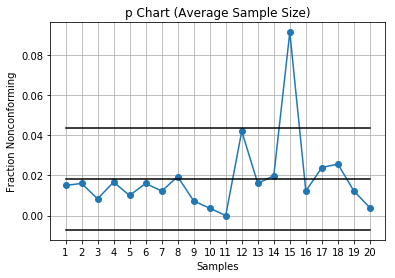

In [16]:
m=20
ucl_line = np.full(m,UCL_p) 
lcl_line = np.full(m,LCL_p)
cl_line = np.full(m,CL_p)
plt.plot(pi,marker="o")
plt.plot(ucl_line,color='k')
plt.plot(lcl_line,color='k')
plt.plot(cl_line,color='k')

labels = list(range(1,m+1)) 
x = list(range(0,m)) 
plt.xticks(x,labels) 

plt.grid(True)
plt.title('p Chart (Average Sample Size)')
plt.ylabel('Fraction Nonconforming')
plt.xlabel('Samples')
plt.show()

# There is a point out of bounds. Iterate in Q9.

## 9. What are the center line and the control limits after taking out any out-of-bound point?
ANS: The center line and control limits after taking out any out-of-bound points are CL=0.0132, UCL=0.0349 and LCL=-0.00846

### Iterate

In [17]:
pi = pi[(pi > LCL_p) & (pi < UCL_p)]
pbar = pi.mean()
CL_p = pbar
UCL_p = pbar + 3*np.sqrt((pbar*(1-pbar))/nbar)
LCL_p = pbar - 3*np.sqrt((pbar*(1-pbar))/nbar)

print('CL=', CL_p)
print('UCL=', UCL_p)
print('LCL=', LCL_p)

CL= 0.014748066709523623
UCL= 0.0376286047228354
LCL= -0.008132471303788151


### Plot to check no remaining points out of bounds

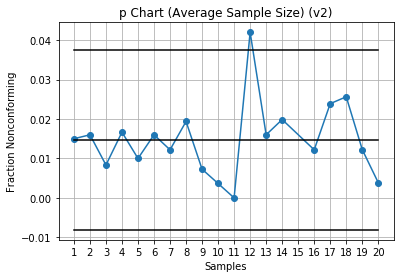

In [18]:
m=20
ucl_line = np.full(m,UCL_p) 
lcl_line = np.full(m,LCL_p)
cl_line = np.full(m,CL_p)
plt.plot(pi,marker="o")
plt.plot(ucl_line,color='k')
plt.plot(lcl_line,color='k')
plt.plot(cl_line,color='k')

labels = list(range(1,m+1)) 
x = list(range(0,m)) 
plt.xticks(x,labels) 

plt.grid(True)
plt.title('p Chart (Average Sample Size) (v2)')
plt.ylabel('Fraction Nonconforming')
plt.xlabel('Samples')
plt.show()

# There is a point out of bounds. Iterate again.

### Iterate

In [19]:
pi = pi[(pi > LCL_p) & (pi < UCL_p)]
pbar = pi.mean()
CL_p = pbar
UCL_p = pbar + 3*np.sqrt((pbar*(1-pbar))/nbar)
LCL_p = pbar - 3*np.sqrt((pbar*(1-pbar))/nbar)

print('CL=', CL_p)
print('UCL=', UCL_p)
print('LCL=', LCL_p)

CL= 0.01323313670879221
UCL= 0.03492334465974914
LCL= -0.008457071242164717


### Plot to check no remaining points out of bounds

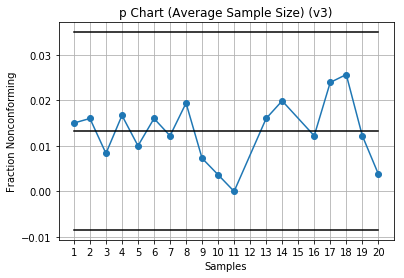

In [20]:
m=20
ucl_line = np.full(m,UCL_p) 
lcl_line = np.full(m,LCL_p)
cl_line = np.full(m,CL_p)
plt.plot(pi,marker="o")
plt.plot(ucl_line,color='k')
plt.plot(lcl_line,color='k')
plt.plot(cl_line,color='k')

labels = list(range(1,m+1)) 
x = list(range(0,m)) 
plt.xticks(x,labels) 

plt.grid(True)
plt.title('p Chart (Average Sample Size) (v3)')
plt.ylabel('Fraction Nonconforming')
plt.xlabel('Samples')
plt.show()

# There are no points out of bounds.

## 10. Starting again with the original data, use the standardized control chart approach. Is the process in statistical control?
ANS: No, the process is not in statistical control because there is a point out of bounds in the standardized control chart.

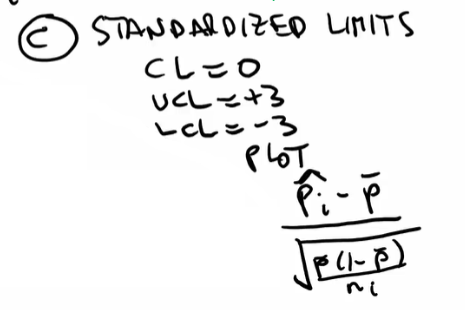

### Calculate

In [21]:
pbar=df.num_late.sum()/df.num_app.sum() # Original data
pi=df.num_late/df.num_app # Original data

# Standardized control chart has CL=0, UCL=3 and LCL=-3.
zi_num = pi-pbar # Numerator
zi_den = np.sqrt((pbar*(1-pbar))/ni) # Denominator
zi=zi_num/zi_den   

### Plot

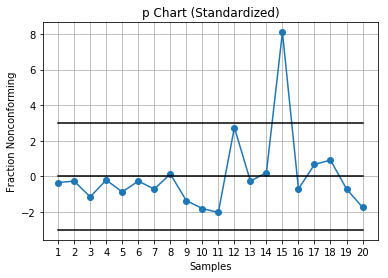

In [22]:
m=20
ucl_line = np.full(m,3) 
lcl_line = np.full(m,-3)
cl_line = np.full(m,0)
plt.plot(zi,marker="o")
plt.plot(ucl_line,color='k')
plt.plot(lcl_line,color='k')
plt.plot(cl_line,color='k')

labels = list(range(1,m+1)) 
x = list(range(0,m)) 
plt.xticks(x,labels) 

plt.grid(True)
plt.title('p Chart (Standardized)')
plt.ylabel('Fraction Nonconforming')
plt.xlabel('Samples')
plt.show()